<a href="https://colab.research.google.com/github/OussemaOmri/Prediction-of-real-estate-prices/blob/main/Machine_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
import numpy as np # linear algebra
import pandas as pd # dataframes, data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots
# Tools from Scikit Learn library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, BayesianRidge,ARDRegression
from sklearn.gaussian_process import GaussianProcessRegressor

Load data from train and test files

In [ ]:
# Loading the training dataset as a Pandas DataFrame
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
display(df_train)
display(df_test)

,Id,category,type,city,region,size,room_count,bathroom_count,price
0,46,Terrains et Fermes,À Vendre,Ariana,Raoued,NaN,NaN,NaN,90000.00
1,5683,Appartements,À Vendre,Ariana,Ariana,98.0,3.0,1.0,130.00
2,10844,Terrains et Fermes,À Vendre,Ariana,Raoued,NaN,NaN,NaN,400.00
3,289,Appartements,À Louer,Sfax,Route Menzel Chaker,95.0,2.0,1.0,0.48
4,8267,Maisons et Villas,À Vendre,Bizerte,Bizerte,270.0,7.0,3.0,520.00
...,...,...,...,...,...,...,...,...,...
8918,6237,Maisons et Villas,À Vendre,Nabeul,Soliman,528.0,3.0,1.0,528.00
8919,5853,Maisons et Villas,À Louer,Ariana,Jardins D'el Menzah,130.0,2.0,2.0,0.70
8920,3519,Appartements,À Louer,Sousse,Autres villes,60.0,2.0,1.0,0.70
8921,688,Appartements,À Vendre,Ben arous,Autres villes,70.0,1.0,1.0,110.00


,Id,category,type,city,region,size,room_count,bathroom_count
0,5376,Terrains et Fermes,À Vendre,Médenine,Zarzis,NaN,NaN,NaN
1,9637,Appartements,À Vendre,Ariana,Ariana Ville,135.0,3.0,2.0
2,9411,Appartements,À Vendre,Tunis,Menzah,100.0,1.0,1.0
3,3265,Maisons et Villas,À Vendre,Nabeul,Hammamet,200.0,3.0,2.0
4,4979,Maisons et Villas,À Vendre,Tunis,Autres villes,180.0,4.0,1.0
...,...,...,...,...,...,...,...,...
3820,3629,Appartements,À Vendre,Tunis,Centre Urbain Nord,68.0,2.0,1.0
3821,9176,Maisons et Villas,À Vendre,Sfax,Route el Ain,440.0,5.0,2.0
3822,10156,Appartements,À Vendre,Ariana,Ennasr,188.0,3.0,2.0
3823,6200,Appartements,À Louer,Tunis,La Marsa,70.0,1.0,1.0


In [ ]:
print(df_train)

         Id            category      type  ... room_count bathroom_count     price
0        46  Terrains et Fermes  À Vendre  ...        NaN            NaN  90000.00
1      5683        Appartements  À Vendre  ...        3.0            1.0    130.00
2     10844  Terrains et Fermes  À Vendre  ...        NaN            NaN    400.00
3       289        Appartements   À Louer  ...        2.0            1.0      0.48
4      8267   Maisons et Villas  À Vendre  ...        7.0            3.0    520.00
...     ...                 ...       ...  ...        ...            ...       ...
8918   6237   Maisons et Villas  À Vendre  ...        3.0            1.0    528.00
8919   5853   Maisons et Villas   À Louer  ...        2.0            2.0      0.70
8920   3519        Appartements   À Louer  ...        2.0            1.0      0.70
8921    688        Appartements  À Vendre  ...        1.0            1.0    110.00
8922   7346  Terrains et Fermes  À Vendre  ...        NaN            NaN     17.00

[89

In [ ]:
# Statistical info about data
df_train.describe()

,Id,size,room_count,bathroom_count,price
count,8923.000000,6533.000000,6533.000000,6533.000000,8.923000e+03
mean,6361.404012,179.489668,2.767029,1.402265,1.563912e+04
std,3687.680380,192.821137,1.625323,0.782036,1.066425e+06
min,1.000000,20.000000,1.000000,0.000000,1.000000e-02
25%,3152.500000,83.000000,2.000000,1.000000,8.500000e-01
50%,6330.000000,120.000000,3.000000,1.000000,8.800000e+01
75%,9580.500000,200.000000,3.000000,2.000000,2.561350e+02
max,12747.000000,2000.000000,20.000000,10.000000,1.000000e+08


In [ ]:
# Statistical info about data
df_test.describe()

,Id,size,room_count,bathroom_count
count,3825.000000,2800.000000,2800.000000,2800.000000
mean,6401.717647,178.383571,2.775000,1.407500
std,3662.931941,196.344298,1.617854,0.834681
min,0.000000,20.000000,1.000000,0.000000
25%,3260.000000,83.000000,2.000000,1.000000
50%,6483.000000,120.000000,3.000000,1.000000
75%,9500.000000,193.000000,3.000000,2.000000
max,12745.000000,2000.000000,20.000000,10.000000


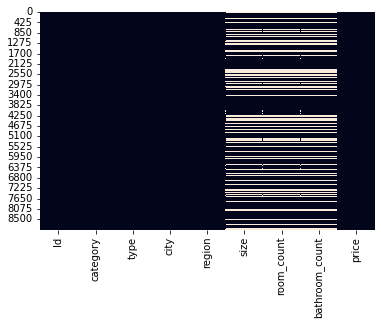

In [ ]:
import seaborn as sns
plt.figure()
sns.heatmap(df_train.isna(),cbar=False)

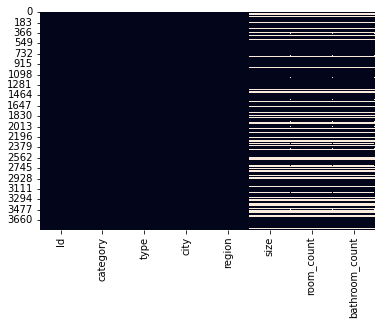

In [ ]:
sns.heatmap(df_test.isna(),cbar=False)

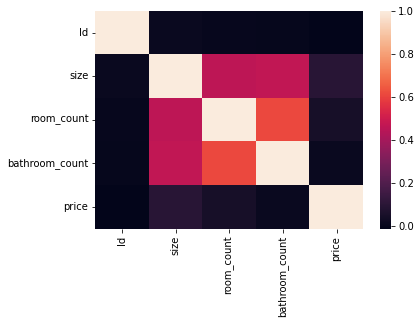

In [ ]:
sns.heatmap(df_train.corr())

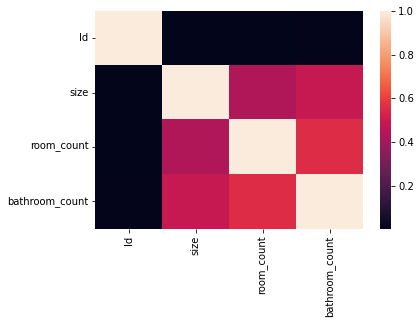

In [ ]:
sns.heatmap(df_test.corr())

Encoding categorical data

In [ ]:
# In order to encode the categorical variables (by one-hot encoding), 
# we need to "get_dummies" from all the data. So we first concatenate them, and then get_dummies
# Make test indices start after the end of train indices
df_test.set_index(df_test.index+len(df_train),inplace=True)
df = df_train.append(df_test)
df = pd.get_dummies(df)
df

,Id,size,room_count,bathroom_count,price,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,category_Terrains et Fermes,type_À Louer,type_À Vendre,city_Ariana,city_Ben arous,city_Bizerte,city_Béja,city_Gabès,city_Gafsa,city_Jendouba,city_Kairouan,city_Kasserine,city_Kébili,city_La manouba,city_Le kef,city_Mahdia,city_Monastir,city_Médenine,city_Nabeul,city_Sfax,city_Sidi bouzid,city_Siliana,city_Sousse,city_Tataouine,city_Tozeur,city_Tunis,city_Zaghouan,region_Agareb,region_Agba,...,region_Sidi Bou Said,region_Sidi Bouzid Est,region_Sidi Bouzid Ouest,region_Sidi Daoud,region_Sidi El Béchir,region_Sidi El Héni,region_Sidi Hassine,region_Sidi Thabet,region_Sidi bouzid,region_Siliana,region_Siliana Nord,region_Siliana Sud,region_Skhira,region_Soliman,region_Souk Jedid,region_Sousse,region_Sousse Jawhara,region_Sousse Médina,region_Sousse Riadh,region_Sousse Sidi Abdelhamid,region_Séjoumi,region_Tabarka,region_Tajerouine,region_Tataouine Nord,region_Tataouine Sud,region_Tebourba,region_Testour,region_Thala,region_Thyna,region_Tinja,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,46,120.0,3.0,1.0,90000.00,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5683,98.0,3.0,1.0,130.00,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10844,120.0,3.0,1.0,400.00,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,289,95.0,2.0,1.0,0.48,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8267,270.0,7.0,3.0,520.00,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,3629,68.0,2.0,1.0,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12744,9176,440.0,5.0,2.0,NaN,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12745,10156,188.0,3.0,2.0,NaN,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12746,6200,70.0,1.0,1.0,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


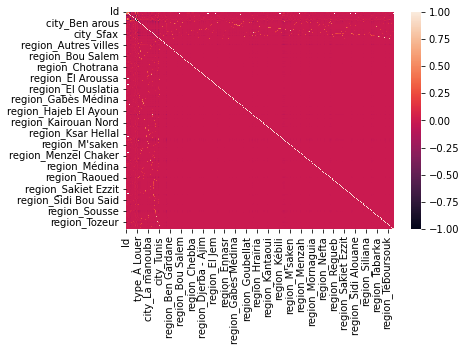

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Get back to train and test data, after being encoded by "get_dummies"
df_train = df[:len(df_train)].copy()
df_test = df[len(df_train):len(df)].copy()
df_test.drop(columns=['price'], inplace=True)
df_test.reset_index(drop=True, inplace=True)
display(df_train)
display(df_test)

,Id,size,room_count,bathroom_count,price,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,category_Terrains et Fermes,type_À Louer,type_À Vendre,city_Ariana,city_Ben arous,city_Bizerte,city_Béja,city_Gabès,city_Gafsa,city_Jendouba,city_Kairouan,city_Kasserine,city_Kébili,city_La manouba,city_Le kef,city_Mahdia,city_Monastir,city_Médenine,city_Nabeul,city_Sfax,city_Sidi bouzid,city_Siliana,city_Sousse,city_Tataouine,city_Tozeur,city_Tunis,city_Zaghouan,region_Agareb,region_Agba,...,region_Sidi Bou Said,region_Sidi Bouzid Est,region_Sidi Bouzid Ouest,region_Sidi Daoud,region_Sidi El Béchir,region_Sidi El Héni,region_Sidi Hassine,region_Sidi Thabet,region_Sidi bouzid,region_Siliana,region_Siliana Nord,region_Siliana Sud,region_Skhira,region_Soliman,region_Souk Jedid,region_Sousse,region_Sousse Jawhara,region_Sousse Médina,region_Sousse Riadh,region_Sousse Sidi Abdelhamid,region_Séjoumi,region_Tabarka,region_Tajerouine,region_Tataouine Nord,region_Tataouine Sud,region_Tebourba,region_Testour,region_Thala,region_Thyna,region_Tinja,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,46,120.0,3.0,1.0,90000.00,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5683,98.0,3.0,1.0,130.00,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10844,120.0,3.0,1.0,400.00,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,289,95.0,2.0,1.0,0.48,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8267,270.0,7.0,3.0,520.00,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,6237,528.0,3.0,1.0,528.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8919,5853,130.0,2.0,2.0,0.70,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8920,3519,60.0,2.0,1.0,0.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8921,688,70.0,1.0,1.0,110.00,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Id,size,room_count,bathroom_count,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,category_Terrains et Fermes,type_À Louer,type_À Vendre,city_Ariana,city_Ben arous,city_Bizerte,city_Béja,city_Gabès,city_Gafsa,city_Jendouba,city_Kairouan,city_Kasserine,city_Kébili,city_La manouba,city_Le kef,city_Mahdia,city_Monastir,city_Médenine,city_Nabeul,city_Sfax,city_Sidi bouzid,city_Siliana,city_Sousse,city_Tataouine,city_Tozeur,city_Tunis,city_Zaghouan,region_Agareb,region_Agba,region_Ain Draham,...,region_Sidi Bou Said,region_Sidi Bouzid Est,region_Sidi Bouzid Ouest,region_Sidi Daoud,region_Sidi El Béchir,region_Sidi El Héni,region_Sidi Hassine,region_Sidi Thabet,region_Sidi bouzid,region_Siliana,region_Siliana Nord,region_Siliana Sud,region_Skhira,region_Soliman,region_Souk Jedid,region_Sousse,region_Sousse Jawhara,region_Sousse Médina,region_Sousse Riadh,region_Sousse Sidi Abdelhamid,region_Séjoumi,region_Tabarka,region_Tajerouine,region_Tataouine Nord,region_Tataouine Sud,region_Tebourba,region_Testour,region_Thala,region_Thyna,region_Tinja,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,5376,120.0,3.0,1.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9637,135.0,3.0,2.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9411,100.0,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3265,200.0,3.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4979,180.0,4.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,3629,68.0,2.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3821,9176,440.0,5.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3822,10156,188.0,3.0,2.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3823,6200,70.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Preparing data for train and test

In [ ]:
# Prepare data for training and test
# replace "NaN" by median of column (but maybe it's not the best way to do...!)
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)
display(df_train)
display(df_test)

,Id,size,room_count,bathroom_count,price,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,category_Terrains et Fermes,type_À Louer,type_À Vendre,city_Ariana,city_Ben arous,city_Bizerte,city_Béja,city_Gabès,city_Gafsa,city_Jendouba,city_Kairouan,city_Kasserine,city_Kébili,city_La manouba,city_Le kef,city_Mahdia,city_Monastir,city_Médenine,city_Nabeul,city_Sfax,city_Sidi bouzid,city_Siliana,city_Sousse,city_Tataouine,city_Tozeur,city_Tunis,city_Zaghouan,region_Agareb,region_Agba,...,region_Sidi Bou Said,region_Sidi Bouzid Est,region_Sidi Bouzid Ouest,region_Sidi Daoud,region_Sidi El Béchir,region_Sidi El Héni,region_Sidi Hassine,region_Sidi Thabet,region_Sidi bouzid,region_Siliana,region_Siliana Nord,region_Siliana Sud,region_Skhira,region_Soliman,region_Souk Jedid,region_Sousse,region_Sousse Jawhara,region_Sousse Médina,region_Sousse Riadh,region_Sousse Sidi Abdelhamid,region_Séjoumi,region_Tabarka,region_Tajerouine,region_Tataouine Nord,region_Tataouine Sud,region_Tebourba,region_Testour,region_Thala,region_Thyna,region_Tinja,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,46,120.0,3.0,1.0,90000.00,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5683,98.0,3.0,1.0,130.00,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10844,120.0,3.0,1.0,400.00,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,289,95.0,2.0,1.0,0.48,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8267,270.0,7.0,3.0,520.00,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,6237,528.0,3.0,1.0,528.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8919,5853,130.0,2.0,2.0,0.70,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8920,3519,60.0,2.0,1.0,0.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8921,688,70.0,1.0,1.0,110.00,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Id,size,room_count,bathroom_count,category_Appartements,category_Bureaux et Plateaux,category_Colocations,category_Locations de vacances,"category_Magasins, Commerces et Locaux industriels",category_Maisons et Villas,category_Terrains et Fermes,type_À Louer,type_À Vendre,city_Ariana,city_Ben arous,city_Bizerte,city_Béja,city_Gabès,city_Gafsa,city_Jendouba,city_Kairouan,city_Kasserine,city_Kébili,city_La manouba,city_Le kef,city_Mahdia,city_Monastir,city_Médenine,city_Nabeul,city_Sfax,city_Sidi bouzid,city_Siliana,city_Sousse,city_Tataouine,city_Tozeur,city_Tunis,city_Zaghouan,region_Agareb,region_Agba,region_Ain Draham,...,region_Sidi Bou Said,region_Sidi Bouzid Est,region_Sidi Bouzid Ouest,region_Sidi Daoud,region_Sidi El Béchir,region_Sidi El Héni,region_Sidi Hassine,region_Sidi Thabet,region_Sidi bouzid,region_Siliana,region_Siliana Nord,region_Siliana Sud,region_Skhira,region_Soliman,region_Souk Jedid,region_Sousse,region_Sousse Jawhara,region_Sousse Médina,region_Sousse Riadh,region_Sousse Sidi Abdelhamid,region_Séjoumi,region_Tabarka,region_Tajerouine,region_Tataouine Nord,region_Tataouine Sud,region_Tebourba,region_Testour,region_Thala,region_Thyna,region_Tinja,region_Tozeur,region_Tunis,region_Téboulba,region_Téboursouk,region_Utique,region_Zaghouan,region_Zaouit-Ksibat Thrayett,region_Zarzis,region_Zarzouna,region_Zéramdine
0,5376,120.0,3.0,1.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9637,135.0,3.0,2.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9411,100.0,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3265,200.0,3.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4979,180.0,4.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,3629,68.0,2.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3821,9176,440.0,5.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3822,10156,188.0,3.0,2.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3823,6200,70.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)
X_train = np.array(df_train.drop(['Id','price'],1))
y_train = np.array(df_train['price'])
X_test = np.array(df_test.drop(['Id'],1))
print(X_train)
print(y_train)
print(X_test)

[[120.   3.   1. ...   0.   0.   0.]
 [ 98.   3.   1. ...   0.   0.   0.]
 [120.   3.   1. ...   0.   0.   0.]
 ...
 [ 60.   2.   1. ...   0.   0.   0.]
 [ 70.   1.   1. ...   0.   0.   0.]
 [120.   3.   1. ...   0.   0.   0.]]
[9.0e+04 1.3e+02 4.0e+02 ... 7.0e-01 1.1e+02 1.7e+01]
[[120.   3.   1. ...   1.   0.   0.]
 [135.   3.   2. ...   0.   0.   0.]
 [100.   1.   1. ...   0.   0.   0.]
 ...
 [188.   3.   2. ...   0.   0.   0.]
 [ 70.   1.   1. ...   0.   0.   0.]
 [ 80.   4.   1. ...   0.   0.   0.]]


**Model training**

Linear Regression

In [ ]:
# Model choice
model = LinearRegression()
# Model training
model.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model.predict(X_train)
# Model parameters
print(model.get_params())
# Model evaluations on the training data
print(model)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
  Train R2 =  0.986
  Train RMSE =  1.263E+05
  Train MAPE =  9251


Predictions for regression

In [ ]:
# Make predictions from the input test for REGRESSION
y_test_pred = model.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,220.437500
1,9637,-980.671875
2,9411,1674.718750
3,3265,-4577.718750
4,4979,8448.390625
...,...,...
3820,3629,2822.593750
3821,9176,3298.875000
3822,10156,5473.468750
3823,6200,-3757.312500


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_reg.csv', index=False)

Pipeline for regression (Optional)

In [ ]:
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline(steps=[('model', model)])
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_train)
print('  Train R2 = ', '%.3f' %r2_score(y_train, preds))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,preds)))


  Train R2 =  0.986
  Train RMSE =  1.263E+05


Grid search for Regression (Optional)

In [ ]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
lr_params={}
lr_grid=GridSearchCV(lr,lr_params,cv=10,verbose=10)
lr_grid.fit(X_train,y_train)
lr_score=lr_grid.cv_results_
print(lr_score)
preds=lr_grid.predict(X_train)
print(preds)
print('  Train R2 = ', '%.3f' %r2_score(y_train, preds))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,preds)))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... , score=-206694964.797, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... , score=-27650211028686.324, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ........................ , score=-473896246632.507, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] ...................... , score=-90586997153543.469, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] ...................... , score=-17400535823844.691, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV] ..................... , score=-230027250856760.156, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s


[CV] ....................... , score=-4520026726290.688, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s remaining:    0.0s


[CV] ........................... , score=-249095627.326, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s


[CV] ........................ , score=-547045722557.197, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s remaining:    0.0s


[CV] ........................ , score=-752619378204.630, total=   0.3s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


{'mean_fit_time': array([0.24170938]), 'std_fit_time': array([0.01776851]), 'mean_score_time': array([0.00458605]), 'std_score_time': array([0.00396148]), 'params': [{}], 'split0_test_score': array([-2.06694965e+08]), 'split1_test_score': array([-2.7650211e+13]), 'split2_test_score': array([-4.73896247e+11]), 'split3_test_score': array([-9.05869972e+13]), 'split4_test_score': array([-1.74005358e+13]), 'split5_test_score': array([-2.30027251e+14]), 'split6_test_score': array([-4.52002673e+12]), 'split7_test_score': array([-2.49095627e+08]), 'split8_test_score': array([-5.47045723e+11]), 'split9_test_score': array([-7.52619378e+11]), 'mean_test_score': array([-3.71959039e+13]), 'std_test_score': array([6.95499973e+13]), 'rank_test_score': array([1], dtype=int32)}
[ 3011.90625   1385.390625  3011.90625  ... -4283.34375   2043.5625
  7069.1875  ]
  Train R2 =  0.986
  Train RMSE =  1.263E+05


XGBRegressor (Optional)

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)
preds = my_model.predict(X_train)
print('  Train R2 = ', '%.3f' %r2_score(y_train, preds))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,preds)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))


[16:59:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
  Train R2 =  0.987
  Train RMSE =  1.198E+05
  Train MAPE =  9251


XGBRegressor predictions (Optional)

In [ ]:
# Make predictions from the input test for XGBRegressor
y_test_pred = my_model.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,45317.984375
1,9637,2606.363525
2,9411,2606.363525
3,3265,2606.363525
4,4979,4137.412598
...,...,...
3820,3629,2606.363525
3821,9176,2606.363525
3822,10156,2606.363525
3823,6200,50.015049


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_XGBReg.csv', index=False)

Ridge

In [ ]:
# Model choice
model1 = Ridge(alpha=0.0000000001)
# Model training
model1.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model1.predict(X_train)
# Model evaluations on the training data
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print(model1)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
  Train R2 =  0.986
  Train RMSE =  1.263E+05
  Train MAPE =  9251


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.93607e-19): result may not be accurate.
  overwrite_a=True).T


In [ ]:
# Make predictions from the input test for XGBRegressor
y_test_pred = model1.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,220.195976
1,9637,-980.976996
2,9411,1674.565855
3,3265,-4577.867545
4,4979,8448.690511
...,...,...
3820,3629,2822.635418
3821,9176,3299.220419
3822,10156,5473.299418
3823,6200,-3757.124222


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_Ridge.csv', index=False)

Pipeline (Optional)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
std_slc = StandardScaler()
pca = decomposition.PCA()
ridge = Ridge()
pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("ridge", ridge)])
n_components = list(range(1,X_train.shape[1]+1,1))
normalize = [True, False]
solver = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
parameters = dict(pca__n_components=n_components,
                      ridge__normalize=normalize,
                      ridge__solver=solver)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train) 

RidgeCV

In [ ]:
# Model choice
model2 = RidgeCV()
# Model training
model2.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model2.predict(X_train)
# Model evaluations on the training data
print(model2)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
  Train R2 =  0.978
  Train RMSE =  1.591E+05
  Train MAPE =  16289


Predictions for RidgeCV

In [ ]:
# Make predictions from the input test for RidgeCV
y_test_pred = model2.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,17225.660844
1,9637,-1000.582764
2,9411,2158.619485
3,3265,-5618.036177
4,4979,5228.000265
...,...,...
3820,3629,3814.421650
3821,9176,2139.146169
3822,10156,5687.571957
3823,6200,-3991.412698


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_ridgeCV.csv', index=False)

Lasso

In [ ]:
# Model choice
model3 = Lasso(alpha=0.01)
# Model training
model3.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model3.predict(X_train)
# Model evaluations on the training data
print(model3)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
  Train R2 =  0.986
  Train RMSE =  1.263E+05
  Train MAPE =  9250


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67499128648871.95, tolerance: 1014665049649.2024
  positive)


Predictions for Lasso

In [ ]:
# Make predictions from the input test for Lasso
y_test_pred = model3.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,237.148297
1,9637,-981.693237
2,9411,1675.076948
3,3265,-4578.335693
4,4979,8447.984008
...,...,...
3820,3629,2824.284469
3821,9176,3304.184894
3822,10156,5471.920439
3823,6200,-3757.427131


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_lasso.csv', index=False)

LassoCV

In [ ]:
# Model choice
model4 = LassoCV()
# Model training
model4.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model4.predict(X_train)
# Model evaluations on the training data
print(model4)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
  Train R2 =  0.969
  Train RMSE =  1.868E+05
  Train MAPE =  3617


predictions for LassoCV

In [ ]:
# Make predictions from the input test for LassoCV
y_test_pred = model4.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,9691.222016
1,9637,3401.532980
2,9411,2565.907152
3,3265,4953.409520
4,4979,4475.909046
...,...,...
3820,3629,1801.906394
3821,9176,10683.415203
3822,10156,4666.909236
3823,6200,1849.656441


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_lassoCV.csv', index=False)

Bayesian Ridge

In [ ]:
# Model choice
model5 = BayesianRidge()
# Model training
model5.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model5.predict(X_train)
# Model evaluations on the training data
print(model5)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
  Train R2 =  0.000
  Train RMSE =  1.066E+06
  Train MAPE =  19342


In [ ]:
# Make predictions from the input test for LassoCV
y_test_pred = model5.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,15639.121348
1,9637,15639.121882
2,9411,15639.120622
3,3265,15639.124222
4,4979,15639.123504
...,...,...
3820,3629,15639.119472
3821,9176,15639.132858
3822,10156,15639.123789
3823,6200,15639.119540


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_lassoCV.csv', index=False)

ADRRegression

In [ ]:
# Model choice
model6 = ARDRegression()
# Model training
model6.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model6.predict(X_train)
# Model evaluations on the training data
print(model6)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)
  Train R2 =  0.000
  Train RMSE =  1.066E+06
  Train MAPE =  19342


In [ ]:
# Make predictions from the input test for LassoCV
y_test_pred = model5.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,15639.121348
1,9637,15639.121882
2,9411,15639.120622
3,3265,15639.124222
4,4979,15639.123504
...,...,...
3820,3629,15639.119472
3821,9176,15639.132858
3822,10156,15639.123789
3823,6200,15639.119540


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_ADR.csv', index=False)

Guassian Process Regressor

In [ ]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# Model choice
kernel = DotProduct() + WhiteKernel()
model7 = GaussianProcessRegressor(kernel=kernel,random_state=0)
# Model training
model7.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model7.predict(X_train)
# Model evaluations on the training data
print(model7)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=0)
  Train R2 =  0.000
  Train RMSE =  1.066E+06
  Train MAPE =  17717


Predictions for Guaussian

In [ ]:
# Make predictions from the input test for REGRESSION
y_test_pred = model7.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,17052.456552
1,9637,15183.598150
2,9411,14630.685293
3,3265,15832.617069
4,4979,16321.226249
...,...,...
3820,3629,14839.564833
3821,9176,17908.155600
3822,10156,15446.906015
3823,6200,13426.146705


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_guassian.csv', index=False)

Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Model choice
model8=RandomForestRegressor(max_depth=15, random_state=0)
# Model training
model8.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model8.predict(X_train)
# Model evaluations on the training data
print(model8)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
  Train R2 =  0.867
  Train RMSE =  3.888E+05
  Train MAPE =  337


In [ ]:
# Make predictions from the input test for REGRESSION
y_test_pred = model7.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,17052.456552
1,9637,15183.598150
2,9411,14630.685293
3,3265,15832.617069
4,4979,16321.226249
...,...,...
3820,3629,14839.564833
3821,9176,17908.155600
3822,10156,15446.906015
3823,6200,13426.146705


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_RFT.csv', index=False)

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Model choice
model9=DecisionTreeRegressor()
# Model training
model9.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model9.predict(X_train)
# Model evaluations on the training data
print(model9)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
  Train R2 =  0.988
  Train RMSE =  1.160E+05
  Train MAPE =  40


In [ ]:
# Make predictions from the input test for REGRESSION
y_test_pred = model9.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,80.00
1,9637,280.00
2,9411,165.00
3,3265,370.00
4,4979,120.00
...,...,...
3820,3629,120.00
3821,9176,350.00
3822,10156,380.00
3823,6200,1.65


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_dec_tree.csv', index=False)

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
model10 = ElasticNet(alpha=0.01)
# Model training
model10.fit(X_train, y_train)
# Model predictions on the trained data
y_train_pred = model10.predict(X_train)
# Model evaluations on the training data
print(model10)
print('  Train R2 = ', '%.3f' %r2_score(y_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_train,y_train_pred)))
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape
print('  Train MAPE = ', '%.0f' %MAPE(y_train,y_train_pred))

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
  Train R2 =  0.051
  Train RMSE =  1.039E+06
  Train MAPE =  51865


In [ ]:
# Make predictions from the input test for REGRESSION
y_test_pred = clf.predict(X_test)
# Add the predictions to the test data
df_test['price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','price']].copy()
df_subm

,Id,price
0,5376,127298.112041
1,9637,2892.424449
2,9411,10645.495978
3,3265,-15094.444608
4,4979,-12753.471212
...,...,...
3820,3629,14640.081065
3821,9176,-552.116491
3822,10156,9411.297637
3823,6200,-5335.117888


In [ ]:
# Save to a csv file, which is the file to be submitted for competition scoring
df_subm.to_csv('submission_ElasticNet.csv', index=False)